In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset generated by the API integration
df = pd.read_csv('breaches_with_stock_prices.csv')

In [3]:
# Drop rows with missing stock prices or records lost
df = df.dropna(subset=['Stock Price', 'records lost'])

In [4]:
# Convert 'records lost' to numeric (remove commas, handle errors)
df['records lost'] = pd.to_numeric(df['records lost'].str.replace(',', ''), errors='coerce')

In [5]:
# Drop rows with missing or zero records lost
df = df.dropna(subset=['records lost'])
df = df[df['records lost'] > 0]

In [8]:
print(df.head())

   organisation  records lost year     Ticker  Stock Price
15    Robinhood       5000937    2021    HOOD   105.339996
16      GoDaddy       1200000    2021    GDDY   146.330002
20       Nvidia        100000    2021    NVDA   175.399994
22  Experian SA      24000000    2020  EXPN.L  3883.000000
32    T-Mobile       76000000    2021    TMUS   259.010010


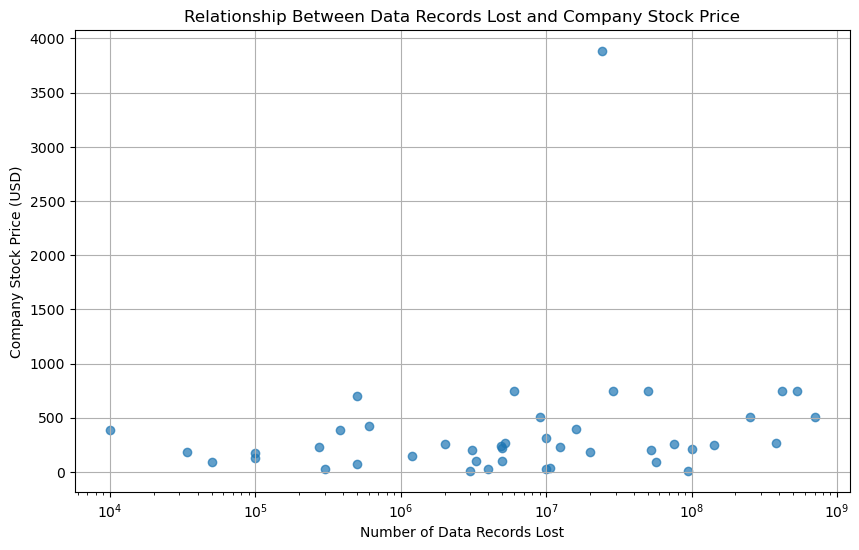

In [6]:
# Plot: Stock Price vs Records Lost
plt.figure(figsize=(10,6))
plt.scatter(df['records lost'], df['Stock Price'], alpha=0.7)
plt.xlabel('Number of Data Records Lost')
plt.ylabel('Company Stock Price (USD)')
plt.title('Relationship Between Data Records Lost and Company Stock Price')
plt.xscale('log')  # Log scale for better visualization
plt.grid(True)
plt.show()

In [7]:
# Data story narrative
print("This plot explores whether there is a relationship between the number of data records lost in a breach and the company's stock price. Each point represents a company that experienced a data breach. The x-axis shows the number of records lost (log scale), and the y-axis shows the company's stock price at the time of analysis. There is no clear direct correlation, but further analysis could explore time-based effects or sector differences.")

This plot explores whether there is a relationship between the number of data records lost in a breach and the company's stock price. Each point represents a company that experienced a data breach. The x-axis shows the number of records lost (log scale), and the y-axis shows the company's stock price at the time of analysis. There is no clear direct correlation, but further analysis could explore time-based effects or sector differences.
